<a href="https://colab.research.google.com/github/GOPIKA-S-S/ML-LAB2/blob/main/LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [69]:
df=pd.read_csv('/content/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28.0,Clothing,5.0,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21.0,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20.0,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66.0,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53.0,Books,4.0,60.60,Cash,24/10/2021,Kanyon


In [70]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            1
age               1
category          1
quantity          1
price             1
payment_method    1
invoice_date      1
shopping_mall     1
dtype: int64

In [71]:
df['quantity'].fillna(0, inplace=True)

In [72]:
df['price'].fillna(0, inplace=True)

In [73]:
df['payment_method'].fillna(0, inplace=True)

In [74]:
df['invoice_date'].fillna(0, inplace=True)

In [75]:
df['gender'].fillna(0,inplace=True)
df['age'].fillna(0,inplace=True)
df['category'].fillna(0,inplace=True)


In [76]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     1
dtype: int64

In [77]:
age_bins=[0,18,25,35,45,float('inf')]
age_labels=['<18','18-25','26-35','36-45','46+']
df['AgeGroup']=pd.cut(df['age'],bins=age_bins,labels=age_labels,right=False)
print(df[['age','AgeGroup']])


        age AgeGroup
0      28.0    26-35
1      21.0    18-25
2      20.0    18-25
3      66.0      46+
4      53.0      46+
...     ...      ...
13804  21.0    18-25
13805  68.0      46+
13806  60.0      46+
13807  68.0      46+
13808   0.0      <18

[13809 rows x 2 columns]


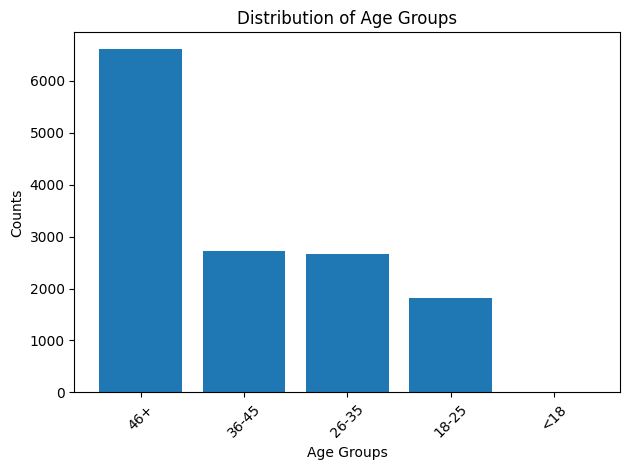

In [78]:
age_group_counts = df['AgeGroup'].value_counts()
# Create a bar plot using Matplotlib
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()


In [79]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=["gender", "category"])

print(df_encoded)




      invoice_no customer_id   age  quantity    price payment_method  \
0        I138884     C241288  28.0       5.0  1500.40    Credit Card   
1        I317333     C111565  21.0       3.0  1800.51     Debit Card   
2        I127801     C266599  20.0       1.0   300.08           Cash   
3        I173702     C988172  66.0       5.0  3000.85    Credit Card   
4        I337046     C189076  53.0       4.0    60.60           Cash   
...          ...         ...   ...       ...      ...            ...   
13804    I379458     C266891  21.0       2.0    81.32           Cash   
13805    I133536     C281143  68.0       3.0   900.24     Debit Card   
13806    I298326     C256477  60.0       2.0  1200.34     Debit Card   
13807    I125256     C376347  68.0       2.0   600.16           Cash   
13808    I353703        C295   0.0       0.0     0.00              0   

      invoice_date   shopping_mall AgeGroup  gender_0  ...  gender_Male  \
0         5/8/2022          Kanyon    26-35         0  ...  

In [80]:
age = df['age']
category_columns = df[['quantity']]

# Calculate the covariance matrix
covariance_matrix = np.cov(age, category_columns, rowvar=False)

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[223.15641332   0.30683408]
 [  0.30683408   2.01381892]]


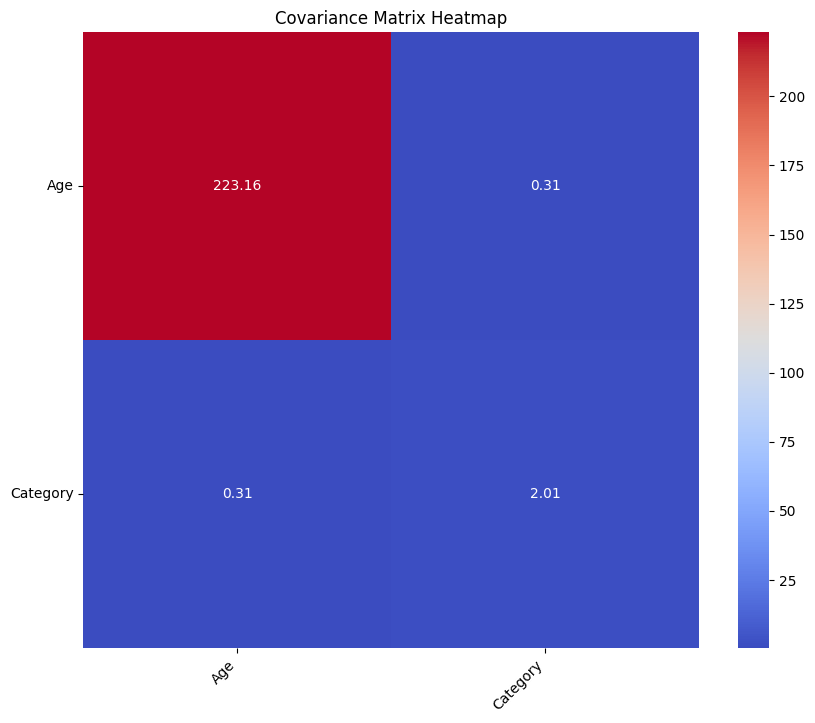

In [81]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = ['Age', 'Category']  # Replace with actual feature names

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Set x and y axis labels
heatmap.set_xticklabels(feature_names, rotation=45, ha='right')
heatmap.set_yticklabels(feature_names, rotation=0)

plt.title("Covariance Matrix Heatmap")
plt.show()


In [82]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['category'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Expected-value:",expected)


Chi-Square Statistic: 13821.285572599818
P-value: 0.0
Expected-value: [[7.24165399e-05 4.89535810e-02 3.42747484e-01 1.54609313e-01
  1.51857484e-01 1.01093490e-01 5.17054095e-02 5.17054095e-02
  9.72554131e-02]
 [5.99246868e-01 4.05090883e+02 2.83623543e+03 1.27939206e+03
  1.25662068e+03 8.36548628e+02 4.27862264e+02 4.27862264e+02
  8.04788544e+02]
 [4.00680715e-01 2.70860164e+02 1.89642183e+03 8.55453328e+02
  8.40227460e+02 5.59350279e+02 2.86086031e+02 2.86086031e+02
  5.38114201e+02]]


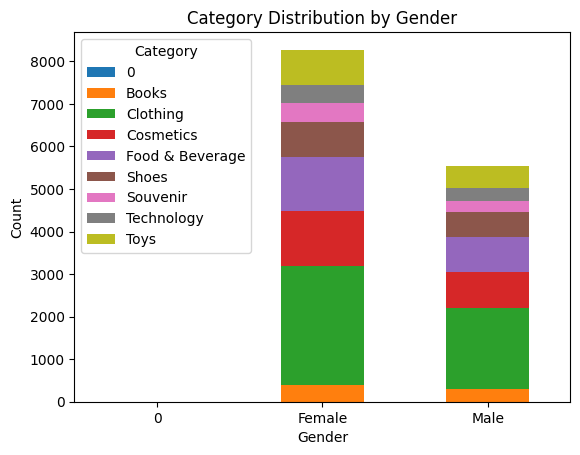

Chi-Square Statistic: 13821.285572599818
p-value: 0.0


In [84]:
# Plot the data
contingency_table.plot(kind="bar", stacked=True)
plt.title("Category Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.show()

print("Chi-Square Statistic:",chi2_stat)
print("p-value:", p_val)



In [87]:
from scipy.stats import ttest_ind
male_data = df[df["gender"] == "Male"]["price"]
female_data = df[df["gender"] == "Female"]["price"]

# Perform independent t-test
t_statistic, p_value = ttest_ind(male_data, female_data)

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")


T-Statistic: 2.4673638418815544
p-value: 0.013623238620393618
Reject null hypothesis: The means are significantly different.


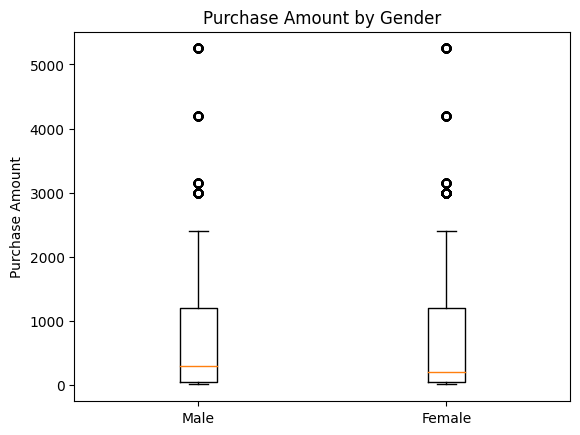

T-Statistic: 2.4673638418815544
p-value: 0.013623238620393618
Reject null hypothesis: The means are significantly different.


In [88]:
# Create a box plot
plt.boxplot([male_data, female_data], labels=["Male", "Female"])
plt.title("Purchase Amount by Gender")
plt.ylabel("Purchase Amount")
plt.show()

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")
